In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [176]:
data = pd.read_csv('titanic.csv')

In [177]:
data.shape

(891, 12)

In [98]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
# Missing completely at random and has no relationship with other features' missing /present values
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [100]:
data['Cabin_Null'] = np.where(data['Cabin'].isnull(), 0,1)

In [101]:
# % of missing values in Cabin
print (1-data['Cabin_Null'].mean())

0.771043771043771


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Cabin_Null   891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 87.1+ KB


In [103]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [104]:
#Check whether there is balanced/imbalanced dataset
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [105]:
data.groupby('Survived')['Cabin_Null'].mean()

Survived
0    0.123862
1    0.397661
Name: Cabin_Null, dtype: float64

In [106]:
data[data['Sex'].isnull()].count()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Cabin_Null     0
dtype: int64

In [107]:
#replace age with median value
data['Age'].median()

data['Age_Median'] = data['Age'].fillna(data['Age'].median())

<Axes: ylabel='Density'>

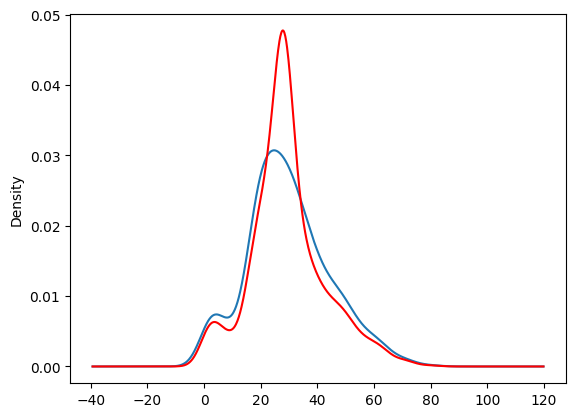

In [108]:
data['Age'].plot(kind='kde')
data['Age_Median'].plot(kind='kde', color='red')

Observation : Using median to impute missing value, data is distorted with high variance and this impacts correlation between features. However, this is robust to outliers

In [109]:
#apply randome sample to impute missing values
random_data = data.Age.dropna().sample(data.Age.isnull().sum(), random_state=0)
random_data.index = data[data['Age'].isnull()].index 
data['Age_Random'] = data['Age'] 
data.loc[data['Age'].isnull(),'Age_Random'] = random_data
data['Age_Random'].isnull().sum()

0

In [110]:
data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Null,Age_Median,Age_Random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,28.0,28.0


<Axes: ylabel='Density'>

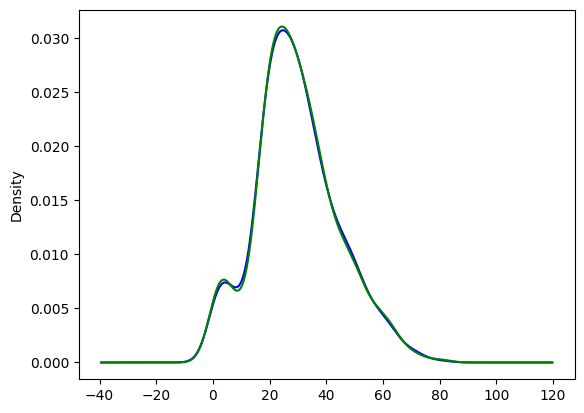

In [111]:
#plot distribution of imputed dataset
data['Age'].plot(kind='kde', color='blue')
data['Age_Random'].plot(kind='kde', color='green')

Observation: Random sample has overcome high variance challenge with median imputation. Random Sample is better for handling missing values which are missing completely at random MCAR

In [112]:
# Handle missing value with capturing NAN values as new feature
data['Age_NAN'] = np.where(data['Age'].isnull(),1,0)

data['Age'].fillna(data.Age.median(), inplace=True)

<Axes: >

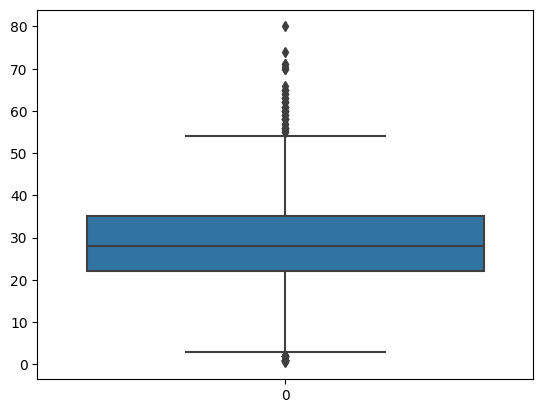

In [122]:
#Handle Missing value with "Data of Distribution for imputation"
sns.boxplot(data=data['Age'])

In [139]:
extremeValue = data.Age.median() + 3* data.Age.std()
extremeValue

71.57949199700212

In [140]:
data['Age_EndOfDist'] = data['Age'].fillna(extremeValue)

In [141]:
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_EndOfDist
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,71.579492
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.000000


<Axes: >

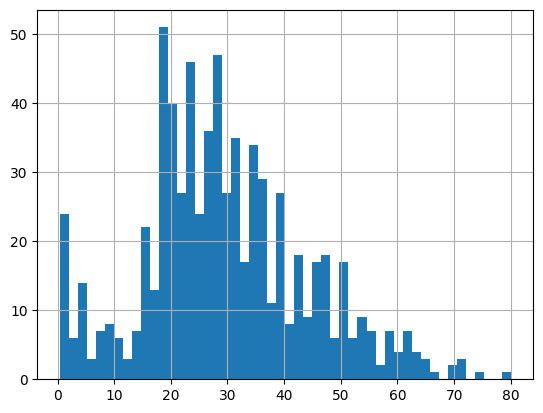

In [142]:
#plot distribution of imputed dataset
data['Age'].hist(bins=50)

<Axes: >

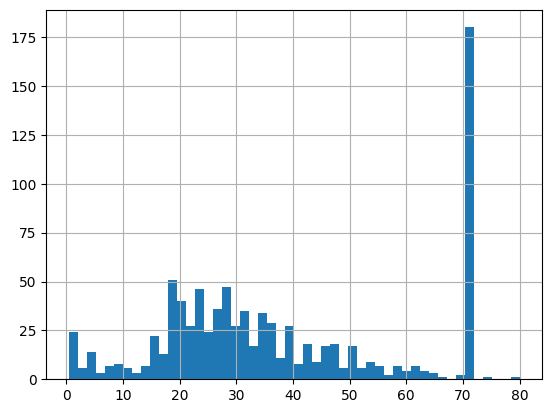

In [143]:
#Outliers are accounted
data['Age_EndOfDist'].hist(bins=50)

In [144]:
#Handle missing value with arbitrary 
data['Age_Arbitrary'] = data['Age'].fillna(100)

In [151]:
# Handle categorical values
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [155]:
#pd.get_dummies(data, 'Sex', drop_first=True, dtype=int)
data['Sex'] = data['Sex'].map({'male':1, 'female':0})

In [165]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_EndOfDist,Age_Arbitrary
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


In [157]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [168]:
pd.get_dummies(data['Embarked'], prefix='Embarked',drop_first=True,dtype=int)

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


## handle missing values in cabin categorical varibale using target guided encoding


In [ ]:
data['Cabin'].value_counts()

In [179]:
data['Cabin'].fillna('Missing', inplace=True)

In [185]:
data['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [184]:
data['Cabin']= data['Cabin'].astype(str).str[0]

In [190]:
ordinal_labels = data.groupby('Cabin')['Survived'].mean().sort_values(ascending=False).index

In [192]:
ordinal_labels = {k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels

{'D': 0, 'E': 1, 'B': 2, 'F': 3, 'C': 4, 'G': 5, 'A': 6, 'M': 7, 'T': 8}

In [193]:
data['Cabin_OrdinalLabel'] = data['Cabin'].map(ordinal_labels)

In [195]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_OrdinalLabel
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,7
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,M,Q,7
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,M,S,7
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,M,S,7
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,M,C,7


## Mean Encoding

In [197]:
mean_encoding = data.groupby('Cabin')['Survived'].mean().sort_values(ascending=False)

In [198]:
data['Cabin_MeanEncoding'] = data['Cabin'].map(mean_encoding)

In [199]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_OrdinalLabel,Cabin_MeanEncoding
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,7,0.299854
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,4,0.593220
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7,0.299854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,4,0.593220
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,7,0.299854
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,M,Q,7,0.299854
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S,1,0.750000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,M,S,7,0.299854
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,M,S,7,0.299854
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,M,C,7,0.299854
